In [1]:
# Random Forest Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


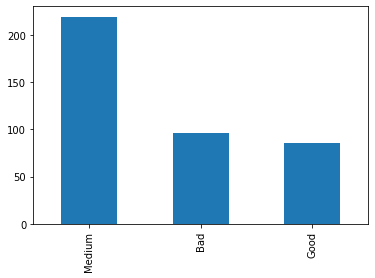

In [6]:
pd.value_counts(df['ShelveLoc']).plot.bar()

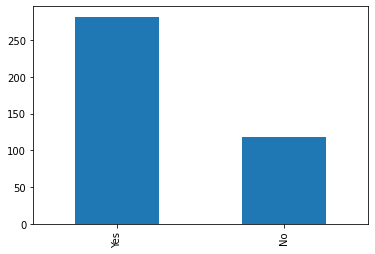

In [7]:
pd.value_counts(df['Urban']).plot.bar()

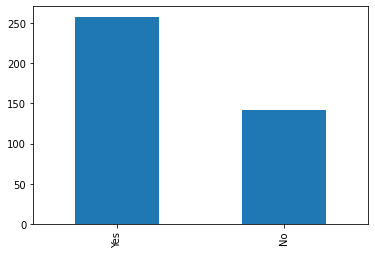

In [8]:
pd.value_counts(df['US']).plot.bar()

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder1=LabelEncoder()
df['ShelveLoc'] =encoder1.fit_transform(df['ShelveLoc'])
df['Urban'] =encoder1.fit_transform(df['Urban'])
df['US'] =encoder1.fit_transform(df['US'])

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
# training the model for outlier detection
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=10, verbose=0, warm_start=False)

In [13]:
# predictions
y_pred_outliers = clf.predict(df)

In [14]:
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [15]:
df['scores']=clf.decision_function(df)

In [16]:
df['anomaly']=clf.predict(df.iloc[:,0:11])

In [17]:
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
0,9.50,138,73,11,276,120,0,42,17,1,1,0.129320,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0.119065,1
2,10.06,113,35,10,269,80,2,59,12,1,1,0.141530,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0.150933,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0.104542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0.104746,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0.083274,1
397,7.41,162,26,12,368,159,2,40,18,1,1,0.086971,1
398,5.94,100,79,7,284,95,0,50,12,1,1,0.133616,1


In [18]:
#Print the outlier data points
df[df['anomaly']==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
42,10.43,77,69,0,25,24,2,50,18,1,0,-0.012724,-1
75,8.55,88,111,23,480,92,0,36,16,0,1,-0.008480,-1
165,0.37,147,58,7,100,191,0,27,15,1,1,-0.009427,-1
367,14.37,95,106,0,256,53,1,52,17,1,0,-0.006873,-1


In [19]:
#Dropping the outliers
df.drop(index = [42,75,165,367], inplace = True)

In [20]:
df.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
0,9.50,138,73,11,276,120,0,42,17,1,1,0.129320,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0.119065,1
2,10.06,113,35,10,269,80,2,59,12,1,1,0.141530,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0.150933,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0.104542,1
5,10.81,124,113,13,501,72,0,78,16,0,1,0.026442,1
6,6.63,115,105,0,45,108,2,71,15,1,0,0.117652,1
7,11.85,136,81,15,425,120,1,67,10,1,1,0.135762,1
8,6.54,132,110,0,108,124,2,76,10,0,0,0.077056,1
9,4.69,132,113,0,131,124,2,76,17,0,1,0.079174,1


In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
0,9.50,138,73,11,276,120,0,42,17,1,1,0.129320,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0.119065,1
2,10.06,113,35,10,269,80,2,59,12,1,1,0.141530,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0.150933,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0.104542,1
5,10.81,124,113,13,501,72,0,78,16,0,1,0.026442,1
6,6.63,115,105,0,45,108,2,71,15,1,0,0.117652,1
7,11.85,136,81,15,425,120,1,67,10,1,1,0.135762,1
8,6.54,132,110,0,108,124,2,76,10,0,0,0.077056,1
9,4.69,132,113,0,131,124,2,76,17,0,1,0.079174,1


In [23]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,scores,anomaly
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.0
mean,7.486894,125.209596,68.482323,6.626263,265.340909,116.055556,1.313131,53.444444,13.873737,0.704545,0.646465,0.106285,1.0
std,2.789896,14.989414,27.977879,6.616184,146.995556,22.784337,0.831609,16.203280,2.618187,0.456824,0.478672,0.034210,0.0
min,0.000000,85.000000,21.000000,0.000000,10.000000,49.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.000069,1.0
25%,5.390000,115.000000,42.000000,0.000000,139.750000,100.750000,1.000000,40.000000,12.000000,0.000000,0.000000,0.086887,1.0
50%,7.470000,125.000000,69.000000,5.000000,274.000000,117.500000,2.000000,55.000000,14.000000,1.000000,1.000000,0.109979,1.0
75%,9.320000,135.000000,90.250000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,0.128689,1.0
max,16.270000,175.000000,120.000000,29.000000,509.000000,185.000000,2.000000,80.000000,18.000000,1.000000,1.000000,0.178835,1.0


In [24]:
data_c=df.iloc[:,0:11]

In [25]:
data_c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
391,12.57,138,108,17,203,128,1,33,14,1,1
392,6.14,139,23,3,37,120,2,55,11,0,1
393,7.41,162,26,12,368,159,2,40,18,1,1
394,5.94,100,79,7,284,95,0,50,12,1,1


In [26]:
#convert target variable into categorical variable
data_c['Sales'].values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96,  4.12,  4.16,  4.56,
       12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,  4.9 ,
        6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,  8.47,
        7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,  5.52,
       12.61,  6.2 , 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,
        4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,
        4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,  4.88,  4.11,
        6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,  3.47,  8.98,
        9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,  8.8 ,  7.57,
        7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34, 11.27,  6.52,
        4.96,  4.47,

In [27]:
import numpy as np

In [28]:
data_c['Sales']=pd.cut(np.array([9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96,  4.12,  4.16,  4.56,
       12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,  4.9 ,
        6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,  8.47,
        7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,  5.52,
       12.61,  6.2 , 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,
        4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,
        4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,  4.88,  4.11,
        6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,  3.47,  8.98,
        9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,  8.8 ,  7.57,
        7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34, 11.27,  6.52,
        4.96,  4.47,  8.41,  6.5 ,  9.54,  7.62,  3.67,  6.44,  5.17,
        6.52, 10.27, 12.3 ,  6.03,  6.53,  7.44,  0.53,  9.09,  8.77,
        3.9 , 10.51,  7.56, 11.48, 10.49, 10.77,  7.64,  5.93,  6.89,
        7.71,  7.49, 10.21, 12.53,  9.32,  4.67,  2.93,  3.63,  5.68,
        8.22,  6.71,  6.71,  7.3 , 11.48,  8.01, 12.49,  9.03,  6.38,
        0.  ,  7.54,  5.61, 10.48, 10.66,  7.78,  4.94,  7.43,  4.74,
        5.32,  9.95, 10.07,  8.68,  6.03,  8.07, 12.11,  8.79,  6.67,
        7.56, 13.28,  7.23,  4.19,  4.1 ,  2.52,  3.62,  6.42,  5.56,
        5.94,  4.1 ,  2.05,  8.74,  5.68,  4.97,  8.19,  7.78,  3.02,
        4.36,  9.39, 12.04,  8.23,  4.83,  2.34,  5.73,  4.34,  9.7 ,
       10.62, 10.59,  6.43,  7.49,  3.45,  4.1 ,  6.68,  7.8 ,  8.69,
        5.4 , 11.19,  5.16,  8.09, 13.14,  8.65,  9.43,  5.53,  9.32,
        9.62,  7.36,  3.89, 10.31, 12.01,  4.68,  7.82,  8.78, 10.  ,
        6.9 ,  5.04,  5.36,  5.05,  9.16,  3.72,  8.31,  5.64,  9.58,
        7.71,  4.2 ,  8.67,  3.47,  5.12,  7.67,  5.71,  6.37,  7.77,
        6.95,  5.31,  9.1 ,  5.83,  6.53,  5.01, 11.99,  4.55, 12.98,
       10.04,  7.22,  6.67,  6.93,  7.8 ,  7.22,  3.42,  2.86, 11.19,
        7.74,  5.36,  6.97,  7.6 ,  7.53,  6.88,  6.98,  8.75,  9.49,
        6.64, 11.82, 11.28, 12.66,  4.21,  8.21,  3.07, 10.98,  9.4 ,
        8.57,  7.41,  5.28, 10.01, 11.93,  8.03,  4.78,  5.9 ,  9.24,
       11.18,  9.53,  6.15,  6.8 ,  9.33,  7.72,  6.39, 15.63,  6.41,
       10.08,  6.97,  5.86,  7.52,  9.16, 10.36,  2.66, 11.7 ,  4.69,
        6.23,  3.15, 11.27,  4.99, 10.1 ,  5.74,  5.87,  7.63,  6.18,
        5.17,  8.61,  5.97, 11.54,  7.5 ,  7.38,  7.81,  5.99,  8.43,
        4.81,  8.97,  6.88, 12.57,  9.32,  8.64, 10.44, 13.44,  9.45,
        5.3 ,  7.02,  3.58, 13.36,  4.17,  3.13,  8.77,  8.68,  5.25,
       10.26, 10.5 ,  6.53,  5.98, 10.71, 10.26,  7.68,  9.08,  7.8 ,
        5.58,  9.44,  7.9 , 16.27,  6.81,  6.11,  5.81,  9.64,  3.9 ,
        4.95,  9.35, 12.85,  5.87,  5.32,  8.67,  8.14,  8.44,  5.47,
        6.1 ,  4.53,  5.57,  5.35, 12.57,  6.14,  7.41,  5.94,  9.71]),3,labels=["Low", "Medium", "High"])

In [29]:
data_c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,Medium,113,35,10,269,80,2,59,12,1,1
3,Medium,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
391,High,138,108,17,203,128,1,33,14,1,1
392,Medium,139,23,3,37,120,2,55,11,0,1
393,Medium,162,26,12,368,159,2,40,18,1,1
394,Medium,100,79,7,284,95,0,50,12,1,1


In [30]:
#building random forest model 
X = data_c.iloc[:,1:]
Y = data_c['Sales']
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7121153846153846


In [31]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [32]:
#Highlighting best features or attributes in dataset at which target variable is highly dependent by RFE method.
# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# fit the model
rfe.fit(X, Y)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=None,
                                     splitter='best'),
    n_features_to_select=3, step=1, verbose=0)

In [33]:
rfe.support_

array([ True, False, False, False,  True, False,  True, False, False,
       False])

In [34]:
rfe.ranking_

array([1, 4, 2, 5, 1, 3, 1, 6, 7, 8])

In [34]:
#from above output we get that variables like comprice,price and age are of more significance in determining the target variable